In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# As a good tradition, before any analysis, we will examine what our data represents.

In [2]:
df = pd.read_csv(r"D:\Python\PP6\insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# We can see that the data includes 6 features, with "charges" as the target variable.
# To explore tmhe data, we will create a dashboard that represents our features and allows us to compare them.

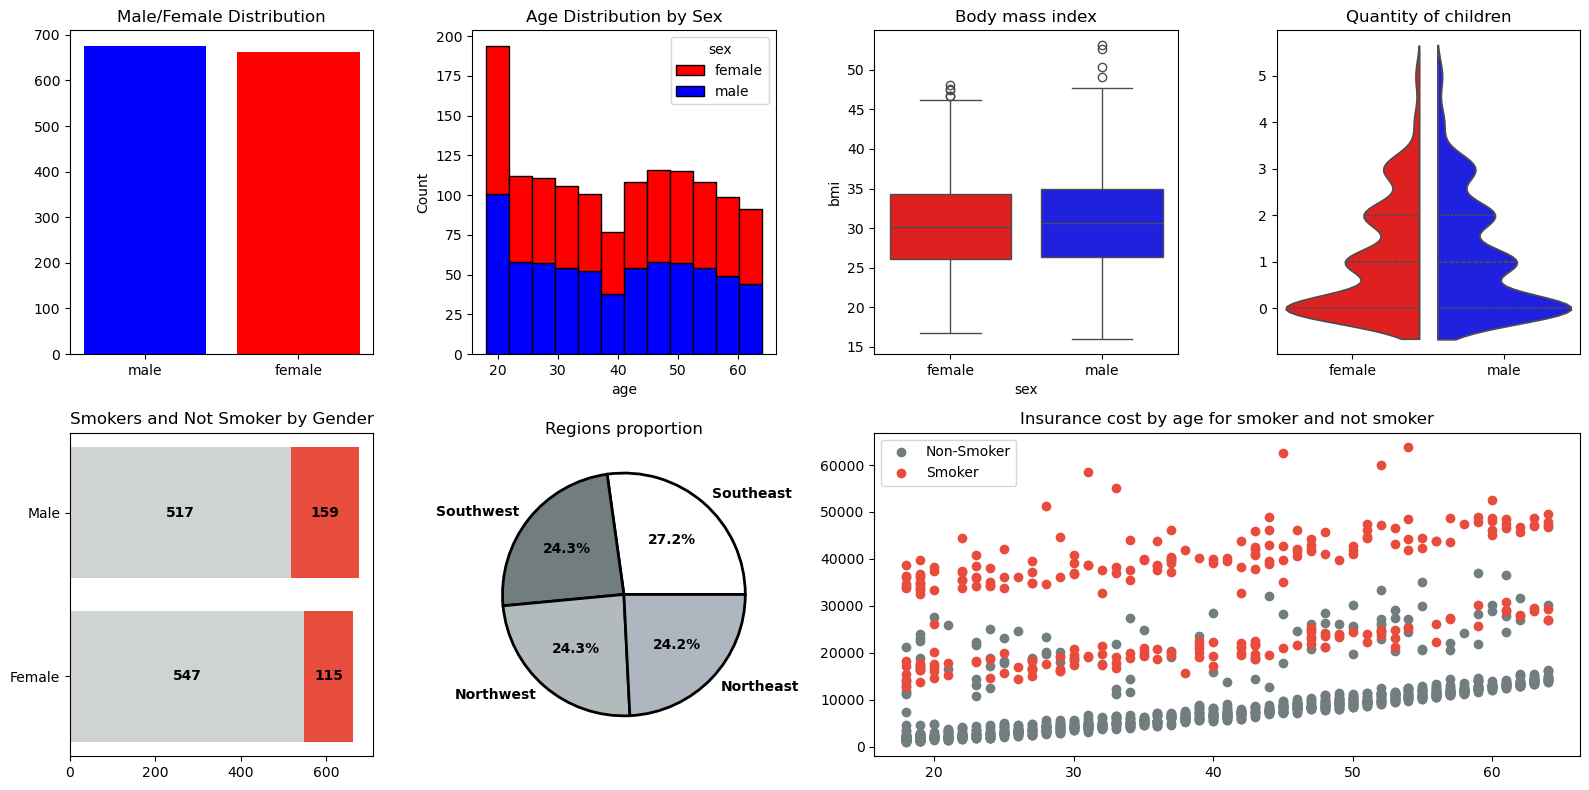

In [5]:
fig = plt.figure(figsize=(16, 8))
gs = fig.add_gridspec(2, 4)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[0, 3])
ax5 = fig.add_subplot(gs[1, 0])
ax6 = fig.add_subplot(gs[1, 1])
ax7 = fig.add_subplot(gs[1, 2:])

ax1.bar(df['sex'].value_counts().index, df['sex'].value_counts(), color=['blue', 'red'])
ax1.set_title('Male/Female Distribution')

sns.histplot(data=df, x="age", hue="sex", multiple="stack", palette=['red', 'blue'], ax=ax2, alpha=1)
ax2.set_title('Age Distribution by Sex')

sns.boxplot(x='sex', y='bmi', data=df, hue='sex', palette=['red', 'blue'], ax=ax3)
ax3.set_title('Body mass index')


sns.violinplot(x='sex', y='children', hue='sex', palette=['red', 'blue'], ax=ax4, data=df, split=True, inner="quart",  gap=-.1)
ax4.set_title('Quantity of children')
ax4.set(xlabel=None)
ax4.set(ylabel=None)

df_counts = df[['sex', 'smoker']].value_counts().reset_index(name='counts').sort_values(by='sex')
female_counts = df_counts[df_counts['sex'] == 'female']['counts'].values
ax5.barh('Female', female_counts[0], color='#d0d3d4', label='Non-Smoker')
ax5.text(female_counts[0] / 2, 'Female', str(female_counts[0]), va='center', ha='center', color='black',
             weight='bold')
ax5.barh('Female', female_counts[1], color='#e74c3c', left=female_counts[0], label='Smoker')
ax5.text(female_counts[0] + female_counts[1] / 2, 'Female', str(female_counts[1]), va='center', 
              ha='center', color='black', weight='bold')
male_counts = df_counts[df_counts['sex'] == 'male']['counts'].values
ax5.barh('Male', male_counts[0], color='#d0d3d4')
ax5.text(male_counts[0] / 2, 'Male', str(male_counts[0]), va='center', ha='center', color='black', 
              weight='bold')
ax5.barh('Male', male_counts[1], color='#e74c3c', left=male_counts[0])
ax5.text(male_counts[0] + male_counts[1] / 2, 'Male', str(male_counts[1]), va='center', 
              ha='center', color='black', weight='bold')
ax5.set_title('Smokers and Not Smoker by Gender')

ax6.pie(df['region'].value_counts(), labels=df['region'].value_counts().index.str.capitalize(), 
        autopct='%1.1f%%', colors=['#ffffff', '#717d7e', '#b2babb', '#aeb6bf'], 
        textprops={'weight': 'bold'},
       wedgeprops={"edgecolor":"k",'linewidth': 2, 'antialiased': True})
ax6.set_title('Regions proportion')

ax7.scatter(df[df['smoker'] == 'no']['age'], df[df['smoker'] == 'no']['charges'], c='#717d7e', label='Non-Smoker')
ax7.scatter(df[df['smoker'] == 'yes']['age'], df[df['smoker'] == 'yes']['charges'], c='#e74c3c', label='Smoker')
ax7.set_title('Insurance cost by age for smoker and not smoker')
plt.legend(loc=2)

plt.tight_layout()
plt.show()

In [ ]:
# The data is well-balanced, with an equal number of men and women across different features.
# We notice that costs have three clusters, and smokers tend to pay more than non-smokers.

In [ ]:
# The variables "sex," "smoker," and "region" need to be encoded:
# - "sex" and "region" will be encoded using OneHotEncoder (or get_dummies);
# - "smoker" will be encoded using LabelEncoder (0 for non-smoker).

In [6]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

onehot = OneHotEncoder(sparse_output=False)
onehot_encoded = onehot.fit_transform(df[['region', 'sex']])
onehot_df = pd.DataFrame(onehot_encoded, columns=onehot.get_feature_names_out(['region', 'sex']))
df = pd.concat([df, onehot_df], axis=1).drop(columns=['region', 'sex'])

label_encoder = LabelEncoder()
df['smoker'] = label_encoder.fit_transform(df['smoker'])

In [ ]:
# Next step is check corelation after encoding

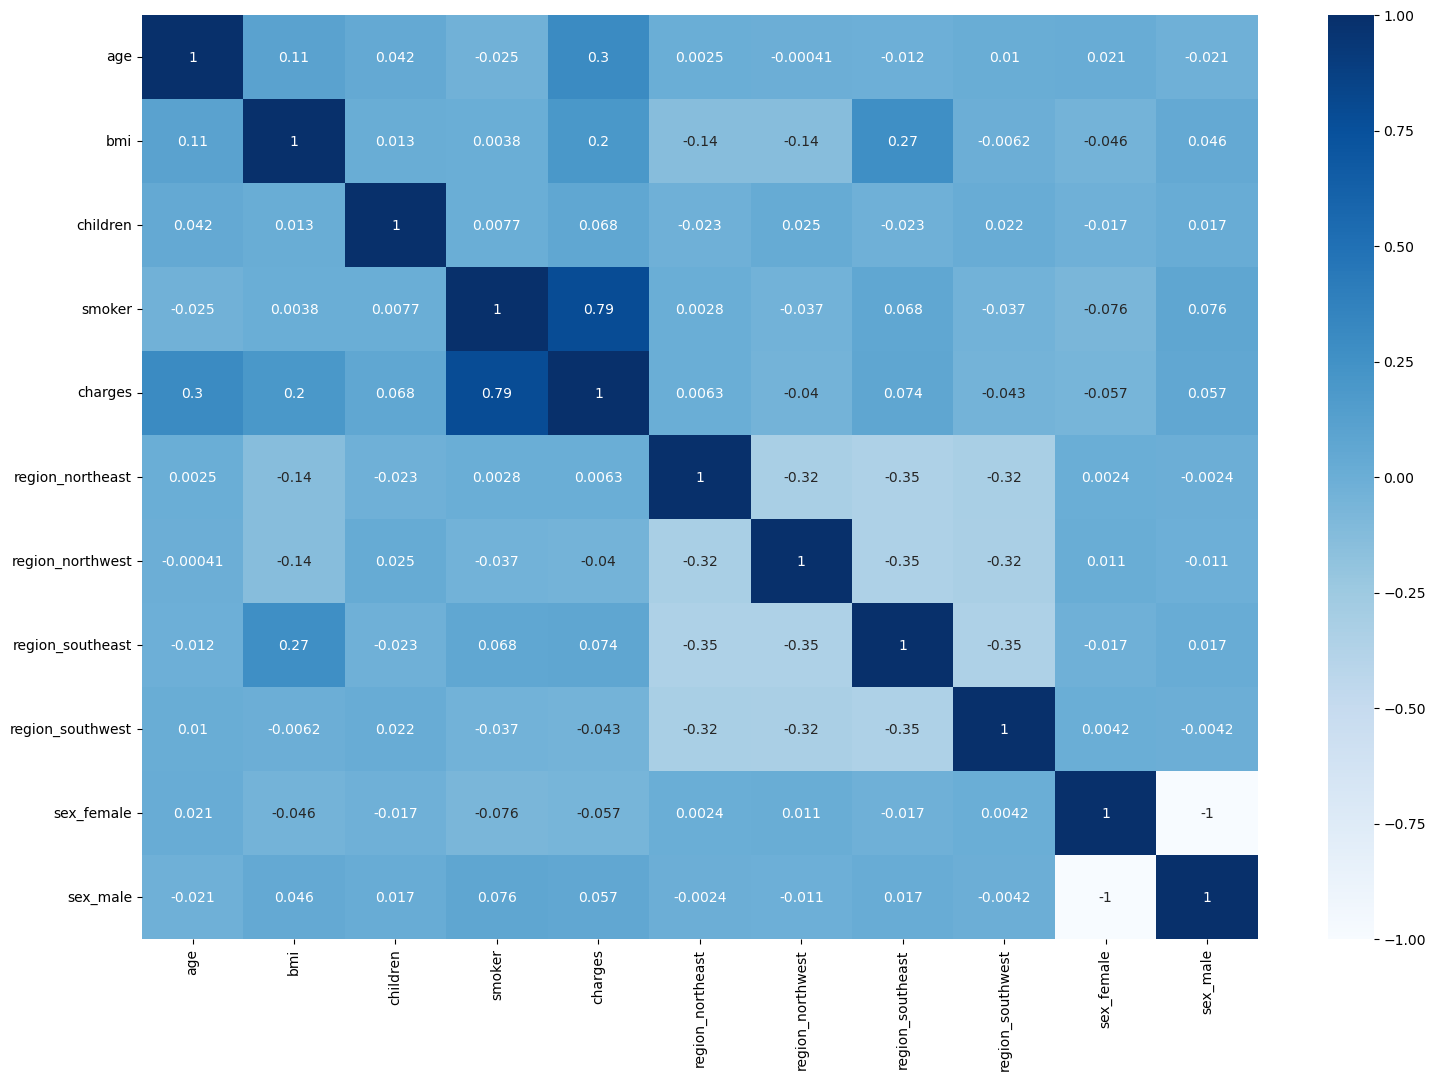

In [7]:
plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

In [ ]:
# We can see that "smoker," "bmi," and "age" are highly correlated with our target variable.

In [ ]:
# The next step is to enter the world of machine learning.
# First, we will check basic ML models, starting with RandomForestRegressor and Ridge regression.
# For evaluatin model we will use R^2 score.

In [8]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
import pandas as pd

# Assuming df is already loaded and preprocessed
X = df.drop('charges', axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Define models and expanded parameter grids
models = {
    'RandomForest': {
        'model': RandomForestRegressor(),
        'params': {
            'model__n_estimators': [50, 100],
            'model__max_depth': [5, 10],
            'model__min_samples_leaf': [1, 2, 4, 6],
            'model__min_samples_split': [2, 4, 6, 8]
        }
    },
    'Ridge': {
        'model': Ridge(),
        'params': {
            'model__alpha': [0.1, 1.0, 10.0]
        }
    }
}

# To store results
best_models = {}

# Loop through models and perform GridSearchCV for each
for model_name, config in models.items():
    pipe = Pipeline([('model', config['model'])])
    grid = GridSearchCV(pipe, config['params'], cv=kfold, scoring='r2')
    grid.fit(X_train, y_train)
    best_models[model_name] = grid.best_estimator_
    print(f"Best parameters for {model_name}: {grid.best_params_}")
    print(f"Best cross-validated score for {model_name}: {grid.best_score_:.4f}")

# Evaluate the best models on the test set
for model_name, model in best_models.items():
    test_score = r2_score(y_test, model.predict(X_test))
    print(f"Test R^2 score for {model_name}: {test_score:.4f}")


Best parameters for RandomForest: {'model__max_depth': 5, 'model__min_samples_leaf': 6, 'model__min_samples_split': 2, 'model__n_estimators': 100}
Best cross-validated score for RandomForest: 0.8572
Best parameters for Ridge: {'model__alpha': 0.1}
Best cross-validated score for Ridge: 0.7389
Test R^2 score for RandomForest: 0.8784
Test R^2 score for Ridge: 0.7836


In [ ]:
# RandomForestRegressor showed good performs.
# We will dig deeper and compare it with XGBRegressor and GradientBoostingRegressor.

In [9]:
from xgboost.sklearn import XGBRegressor

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
XGB_model = XGBRegressor()
XGB_params = {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5],
            'reg_lambda': [0.5, 1.0]
}
XGB_grid = GridSearchCV(XGB_model, XGB_params, cv=kfold, scoring='r2')
XGB_grid.fit(X_train, y_train)

best_XGB = XGB_grid.best_estimator_
print(f"Best parameters for XGBoost: {XGB_grid.best_params_}")
print(f"Best cross-validated score for XGBoost: {XGB_grid.best_score_:.4f}")

# Evaluate the best model on the test set
test_score = r2_score(y_test, best_XGB.predict(X_test))
print(f"Test R^2 score for XGBoost: {test_score:.4f}")

Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'reg_lambda': 1.0}
Best cross-validated score for XGBoost: 0.8572
Test R^2 score for XGBoost: 0.8839


In [10]:
from sklearn.ensemble import GradientBoostingRegressor

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
GB_model = GradientBoostingRegressor()
GB_params = {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5]
}
GB_grid = GridSearchCV(GB_model, GB_params, cv=kfold, scoring='r2')
GB_grid.fit(X_train, y_train)

best_GB = GB_grid.best_estimator_
print(f"Best parameters for Gradient Boosting: {GB_grid.best_params_}")
print(f"Best cross-validated score for Gradient Boosting: {GB_grid.best_score_:.4f}")

# Evaluate the best model on the test set
test_score = r2_score(y_test, best_GB.predict(X_test))
print(f"Test R^2 score for Gradient Boosting: {test_score:.4f}")

Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best cross-validated score for Gradient Boosting: 0.8565
Test R^2 score for Gradient Boosting: 0.8802


In [ ]:
# R^2 tell enough and we able to go further.
# After evaluating four models, we will keep two for the final MAE and RMSE comparison.

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred_XGB = best_XGB.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_XGB)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_XGB))
print(f"XGBoost: \nMAE: {mae:.4f}, \nRMSE: {rmse:.4f}")

y_pred_RandomForest = best_models['RandomForest'].predict(X_test)
mae = mean_absolute_error(y_test, y_pred_RandomForest)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_RandomForest))
print(f"RandomForest: \nMAE: {mae:.4f}, \nRMSE: {rmse:.4f}")

XGBoost: 
MAE: 2445.2911, 
RMSE: 4244.8565
RandomForest: 
MAE: 2488.8076, 
RMSE: 4344.4609


In [ ]:
# The winner is XGBoost, which we can use to predict insurance costs based on our chosen parameters.
# Let's try to predict self-insurance costs.

In [12]:
print(best_XGB.feature_names_in_)

['age' 'bmi' 'children' 'smoker' 'region_northeast' 'region_northwest'
 'region_southeast' 'region_southwest' 'sex_female' 'sex_male']


In [13]:
X_self = pd.DataFrame(np.array([[27, 28, 1, 0, 0, 0, 0, 0, 0, 1]]), 
                     columns=['age', 'bmi', 'children', 'smoker', 'region_northeast', 'region_northwest', 'region_southeast', 
                              'region_southwest', 'sex_female', 'sex_male'])
y_self = best_XGB.predict(X_self)
print(f'Self helth insurance will be cost: {y_self[0]:.2f}')

Self helth insurance will be cost: 5510.91


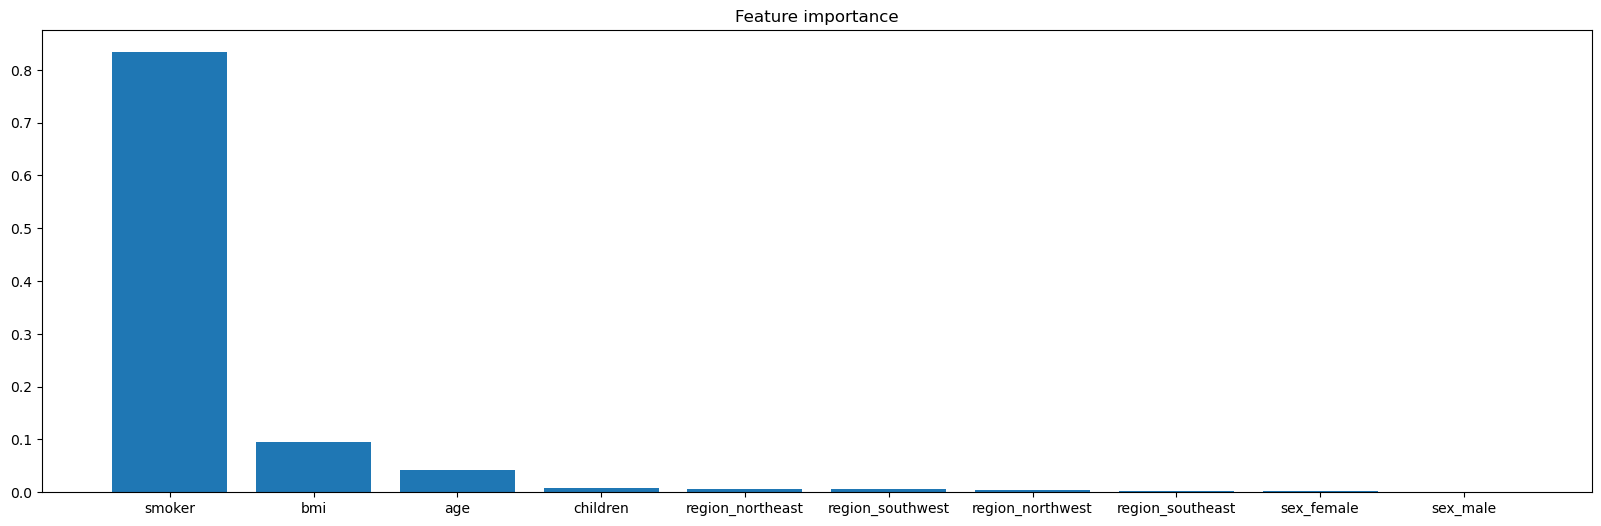

In [14]:
feature_importance = sorted(zip(best_XGB.feature_names_in_, best_XGB.feature_importances_), key=lambda x: x[1], reverse=True)
plt.figure(figsize=(20, 6))
plt.bar([x[0] for x in feature_importance], [x[1] for x in feature_importance])
plt.title('Feature importance')
plt.show()

In [ ]:
# A feature importance chart and the corelation heatmap confirm the observed correlations.

In [ ]:
# We were able to complete our project with a robust model and a clear understanding of self-insurance price calculation.